<a href="https://colab.research.google.com/github/Umesh2851997/Yes-bank-stock-closing-price-prediction/blob/main/Yes_Bank_Closing_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Summary -**
#Capston Project -3

##SUPERVISED - REGRESSION

###Project - Yes bank stock closing price prediction



Yes Bank is a banking company that was founded in 2004 that offers a wide range of differentiated products for its corporate and retail customers through retail banking and asset management services. It is also a publically traded company. That provides an opportunity for anyone to invest in Yes bank and become a shareholder. But at the same time, it means that the valuation of the company is now in the hands of investors and speculators as share prices are often heavily impacted by public opinion. We have used yes bank stock price data set. This dataset contains 5 different features that can be used for predicting close price prediction using machine learning. We have built machine learning regression model for price prediction. We have used some of best models.


# **GitHub Link -**
https://github.com/Umesh2851997/Yes-bank-stock-closing-price-prediction

# **Problem Statement**


Yes Bank, a prominent institution in the Indian financial sector, gained attention in the media since 2018 due to the fraud case linked to Rana Kapoor. Given this context, it becomes intriguing to analyze the influence of this incident on the bank's stock prices and evaluate the efficacy of time series models or other predictive models in capturing such complex situations. The dataset at hand encompasses monthly stock prices of Yes Bank since its establishment, featuring details like monthly closing, opening, highest, and lowest stock prices.



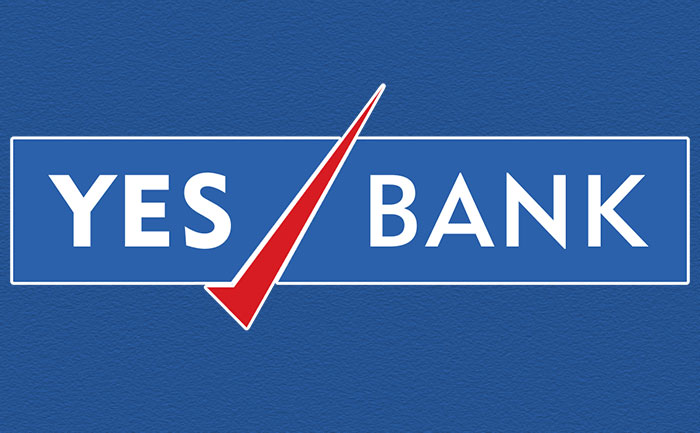

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [89]:
import warnings
warnings.filterwarnings('ignore')

# Import Wrangling Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


# Data preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler #scale the data

# Model selection and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
#grid search to optimize parameters,
#model training, evaluation, and hyperparameter tuning.

# Regression models
from sklearn.linear_model import LinearRegression # regression model
from sklearn.neighbors import KNeighborsRegressor #Knn model
from sklearn.ensemble import RandomForestRegressor #random forest
from sklearn.linear_model import Lasso, Ridge, ElasticNet  # data regularization

# import required metrics for model performance
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error




### Dataset Loading

In [90]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [91]:
# Dataset First Look
df = pd.read_csv("/content/drive/MyDrive/My_new_numpy/data_YesBank_StockPrices.csv")
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [92]:
#last 5 rows
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


### Dataset Rows & Columns count

In [93]:
# Dataset Rows & Columns count
df.shape

(185, 5)

### Dataset Information

In [94]:
# Dataset Info
df.describe().T
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


#### Duplicate Values

In [95]:
# Dataset Duplicate Value Count
df.duplicated()
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


#### Missing Values/Null Values

In [96]:
# Missing Values/Null Values Count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [97]:
# Visualizing the missing values
df.isna().sum()


Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [98]:
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')

In [99]:
df

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,2020-07-01,25.60,28.30,11.10,11.95
181,2020-08-01,12.00,17.16,11.85,14.37
182,2020-09-01,14.30,15.34,12.75,13.15
183,2020-10-01,13.30,14.01,12.11,12.42


In [100]:
col = list(df.columns)
col

['Date', 'Open', 'High', 'Low', 'Close']

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [101]:
df

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,2020-07-01,25.60,28.30,11.10,11.95
181,2020-08-01,12.00,17.16,11.85,14.37
182,2020-09-01,14.30,15.34,12.75,13.15
183,2020-10-01,13.30,14.01,12.11,12.42


#Univariate Analysis

#### Chart - 1

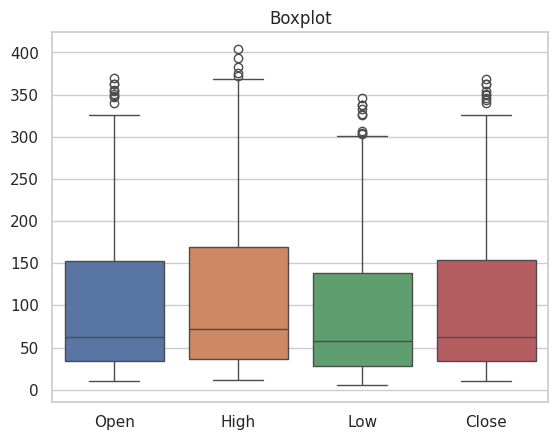

In [102]:
sns.boxplot(df[['Open', 'High', 'Low', 'Close']]) #box_plot
plt.title('Boxplot')
plt.show()

#### Chart - 2

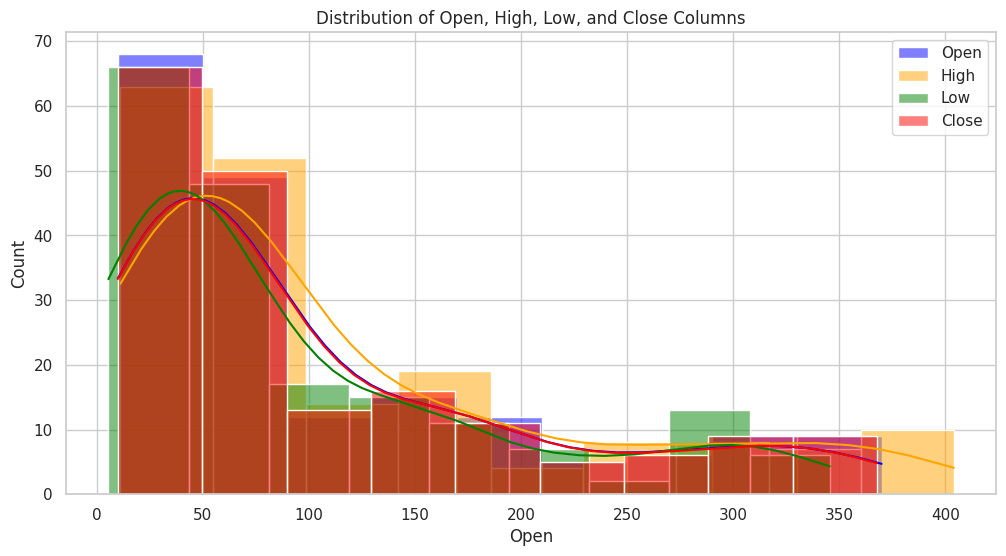

In [103]:
plt.figure(figsize=(12, 6))

# Create individual distribution plots for each column
sns.histplot(df['Open'], kde=True, label='Open', color='blue')
sns.histplot(df['High'], kde=True, label='High', color='orange')
sns.histplot(df['Low'], kde=True, label='Low', color='green')
sns.histplot(df['Close'], kde=True, label='Close', color='red')

# Set the title and display the legend
plt.title("Distribution of Open, High, Low, and Close Columns")
plt.legend()
plt.show()

#Bivariate Analysis

#### Chart - 3

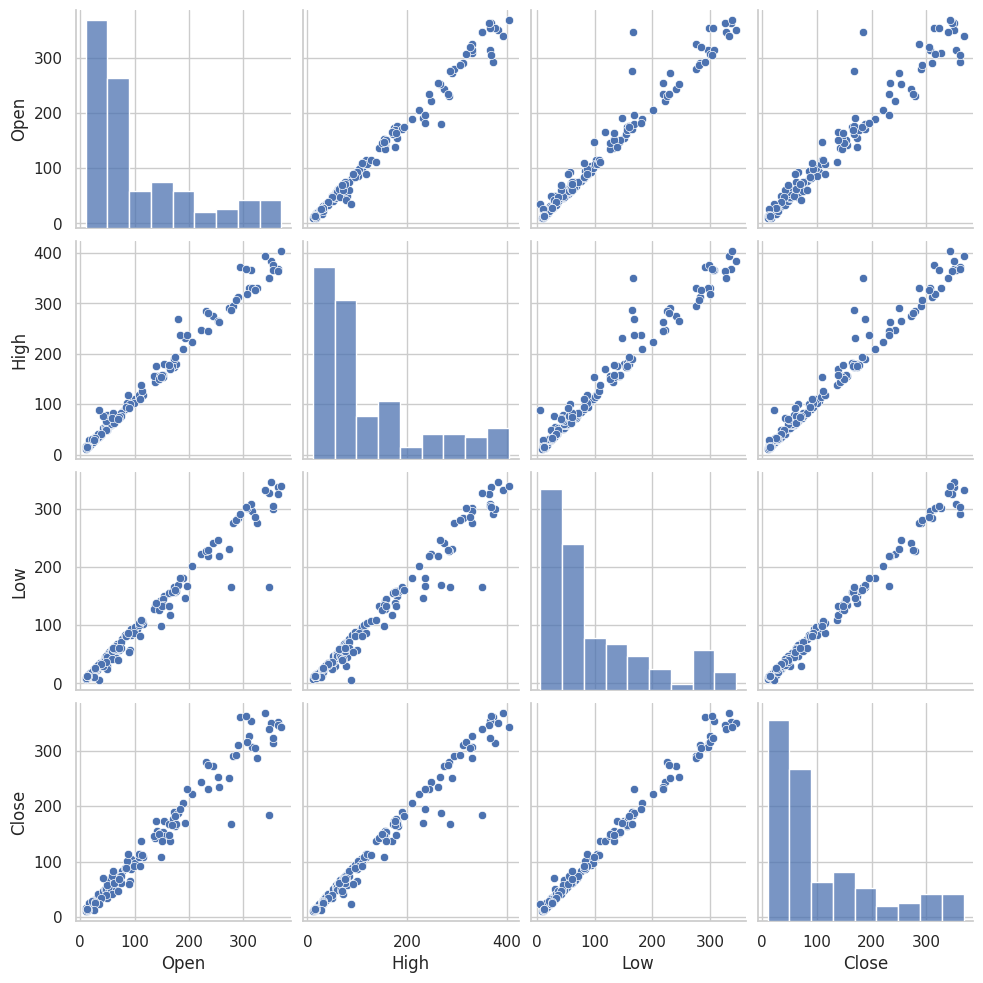

In [104]:
sns.pairplot(df[[ 'Open', 'High', 'Low', 'Close']])
plt.show()

#### Chart - 4

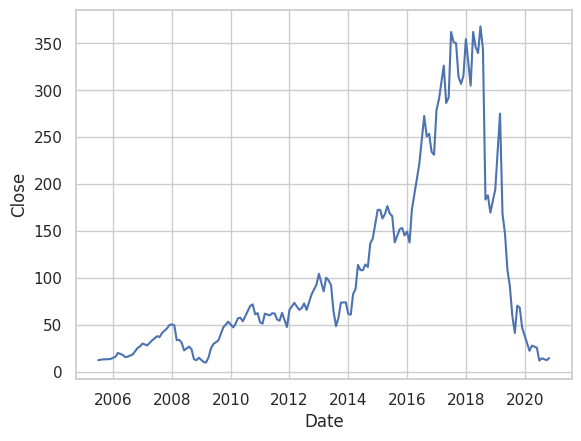

In [105]:
#line chart
sns.lineplot(x='Date',y='Close',data=df)
plt.show()

#### Chart - 5

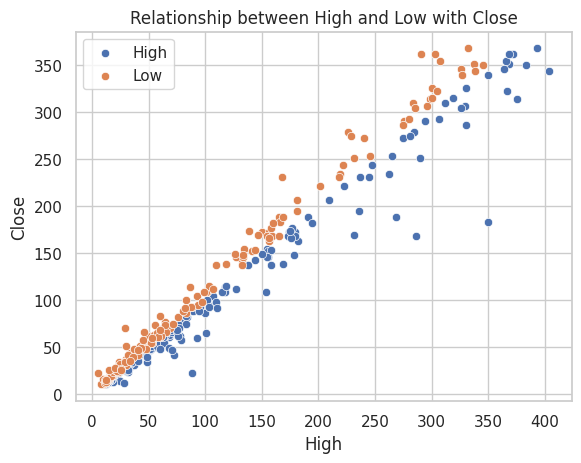

In [106]:
# Assuming df is your DataFrame
sns.scatterplot(x='High', y='Close', data=df, label='High')
sns.scatterplot(x='Low', y='Close', data=df, label='Low')

plt.title('Relationship between High and Low with Close')
plt.legend()
plt.show()

#### Chart - 6

In [107]:
#set the index of Date
df.set_index('Date',inplace=True)

In [108]:
# Upgrade matplotlib
!pip install mplfinance

# Import mplfinance
import mplfinance as mpf


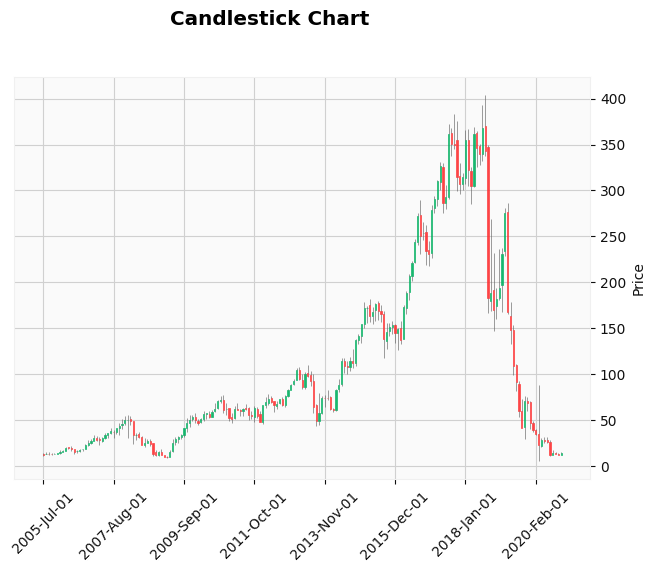

In [109]:
mpl1 = df[['Open', 'High', 'Low', 'Close']]
mpf.plot(mpl1, type='candle', style='yahoo', title='Candlestick Chart')

Candlestick Chart will present you regarding the trends over the given periods from 2005 to 2020. It will show you based on the volume or based on the price.

#Multivariate Analysis

#### Chart - 7

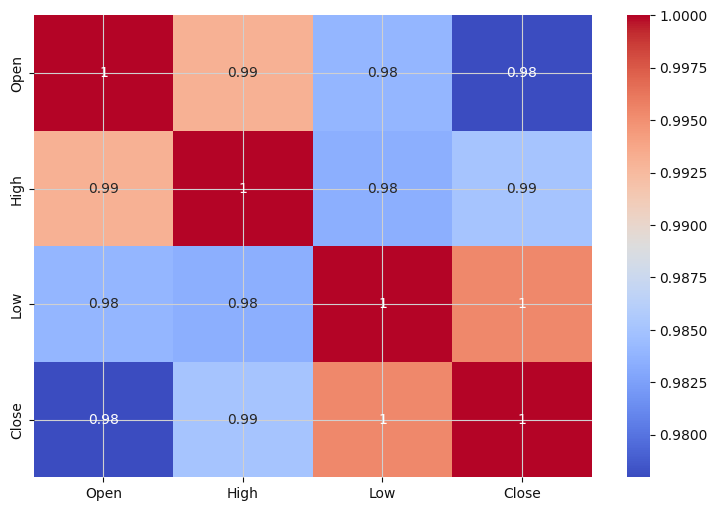

In [110]:
plt.figure(figsize=(9,6))
cor = sns.heatmap(df.corr(),annot=True, cmap='coolwarm')
plt.show()
# plt.figure(figsize=(9,6))
# cor=data.corr()
# sns.heatmap(abs(cor),annot=True,cmap='coolwarm')

All features in the dataset exhibit strong correlations with each other, suggesting high multicollinearity. In the context of linear regression, which assumes minimal multicollinearity, selecting a single feature or deriving an average from these correlated features becomes a viable approach. This simplification aids the model in avoiding redundancy while maintaining predictive accuracy. To address multicollinearity more explicitly, variable transformations can be applied. These transformations may involve scaling, normalization, or other techniques to mitigate the impact of highly correlated features. By employing these strategies, we aim to enhance the robustness of the regression model and improve its overall performance.






#Data Preprocessing

 The PowerTransformer is designed to transform the entire distribution of a feature to make it more closely resemble a normal distribution. This transformation can be particularly useful when the data is skewed or exhibits non-normality.

Outliers, on the other hand, are data points that are significantly different from the majority of the data. While power transformations might have an impact on extreme values, their main goal is to address issues related to the overall shape of the distribution, such as skewness.

In [111]:
#PowerTransformer
pw = PowerTransformer(method='box-cox',standardize=True)

In [112]:
#Columns in the Dataset
cf= df[list(df.columns)]
cf

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41
...,...,...,...,...
2020-07-01,25.60,28.30,11.10,11.95
2020-08-01,12.00,17.16,11.85,14.37
2020-09-01,14.30,15.34,12.75,13.15


In [113]:
df['Close'].head()

Date
2005-07-01    12.46
2005-08-01    13.42
2005-09-01    13.30
2005-10-01    12.99
2005-11-01    13.41
Name: Close, dtype: float64

In [114]:
kf = pd.DataFrame(pw.fit_transform(cf))

In [115]:
kf.head()

,0,1,2,3
0,-1.671724,-1.762828,-1.622235,-1.709751
1,-1.704449,-1.700176,-1.518365,-1.635775
2,-1.635576,-1.700867,-1.539820,-1.644731
3,-1.656505,-1.728898,-1.529800,-1.668243
4,-1.645239,-1.771672,-1.493670,-1.636518


In [116]:
kf.rename(columns={0:'Open',1:'High',2:'Low',3:'Close'},inplace=True)

<Axes: >

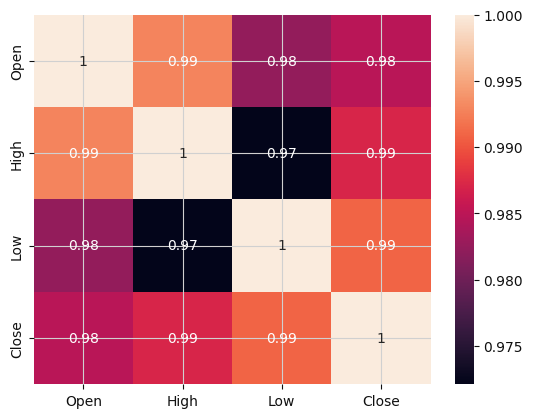

In [117]:
sns.heatmap(kf.corr(),annot=True)

In [118]:
#Columns in the Dataset
column1 = list(kf.columns)
column1

['Open', 'High', 'Low', 'Close']

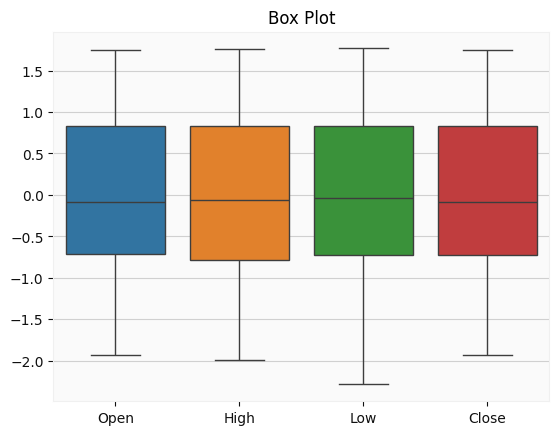

In [119]:
sns.boxplot(kf[column1])
plt.title("Box Plot")
plt.show()

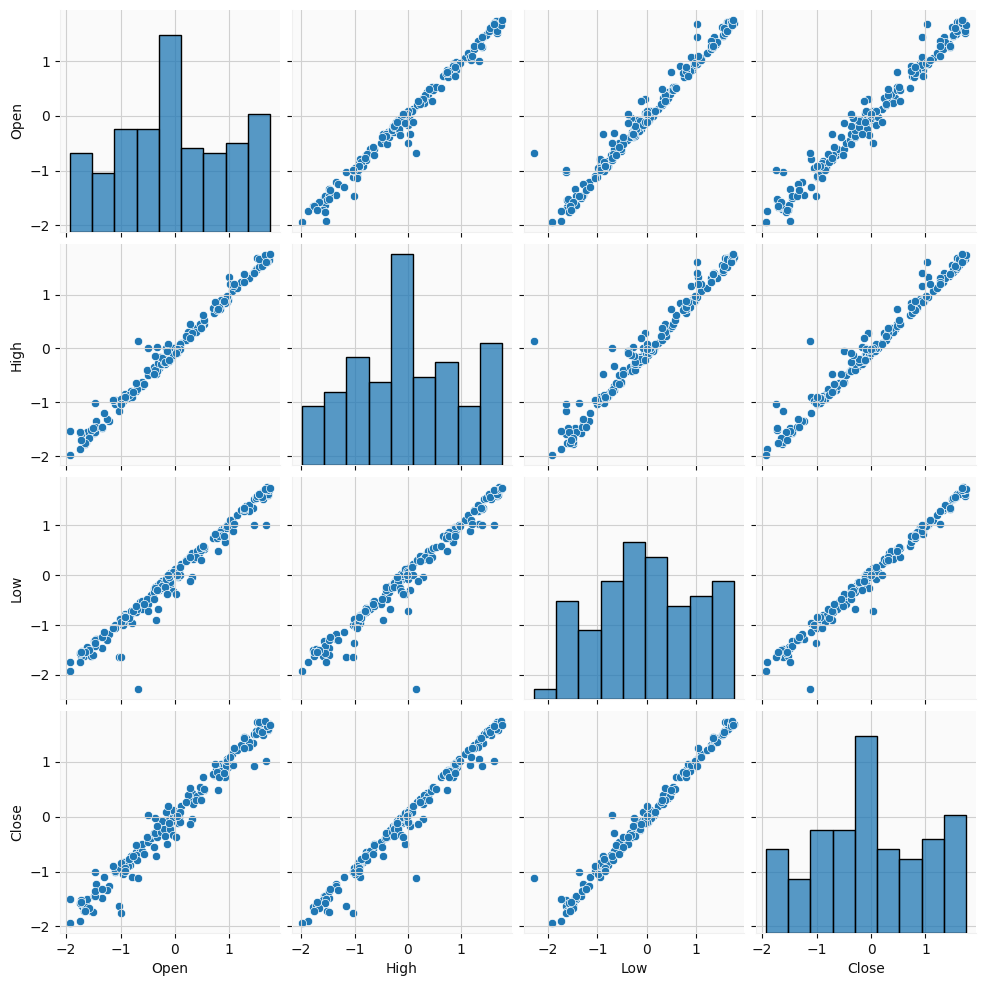

In [120]:
#Pair Plot
sns.pairplot(kf, palette='viridis')

In [121]:
kf.head()

,Open,High,Low,Close
0,-1.671724,-1.762828,-1.622235,-1.709751
1,-1.704449,-1.700176,-1.518365,-1.635775
2,-1.635576,-1.700867,-1.539820,-1.644731
3,-1.656505,-1.728898,-1.529800,-1.668243
4,-1.645239,-1.771672,-1.493670,-1.636518


In [122]:
kf.columns.tolist()

['Open', 'High', 'Low', 'Close']

In [123]:
#Dependent & Independent Variable
dependent_variable = 'Close'
independent_variable = list(set(kf.columns.tolist()) - {dependent_variable})


In [124]:
x=df[independent_variable].values
y = df[dependent_variable].values

In [125]:
#Data Spliting
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

#Linear Regression

In [126]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [127]:
y_pred = reg.predict(x_test)
print(y_pred)

[ 32.28556301 141.3181093   44.90843414 142.02014391  67.16064541
  32.80575776 232.4025937   18.38312048  15.67365593 213.61676302
 300.0063749   87.56250111 153.82787123  59.9852477  341.93643068
 259.94053128  74.74137531  29.07428245 259.92075347  51.81123318
  10.83593004 118.44738333 146.97256691  60.0139961  217.57363908
  47.99821826 249.71964854  15.35727363 108.65154467  53.49733069
 367.84444567 338.68544675  73.75276568 167.7615893   40.3382692
  49.16808148 261.77902456 146.51590507  20.52376167  66.0750167
  50.60227847  15.47343305  61.81720652  52.66733829  40.3416129
  36.14162654  14.88868061  91.17006182  15.48500069  37.41713079
  30.6905884  322.16111205  74.39036805 343.64109622  26.54241918
  45.05181164]


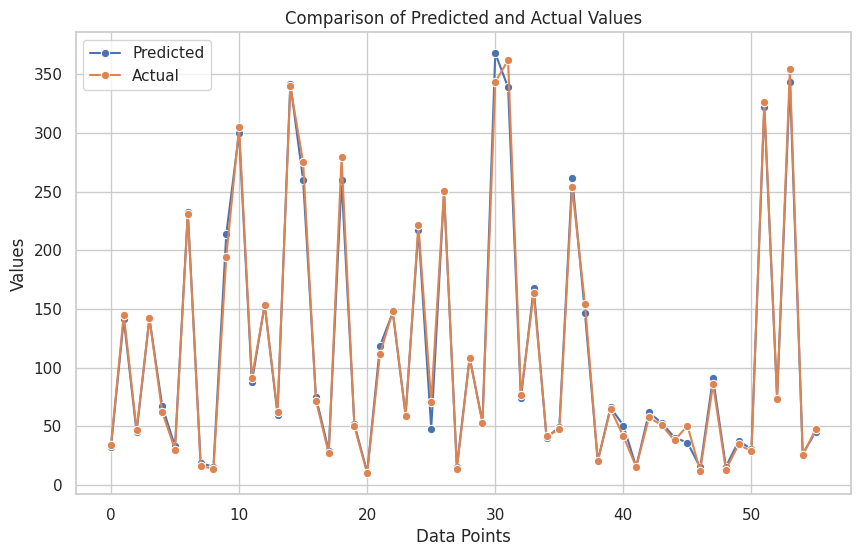

In [128]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plotting predicted values in blue
sns.lineplot(data=y_pred, label="Predicted", marker='o')

# Plotting actual values in orange
sns.lineplot(data=y_test, label="Actual", marker='o')

plt.title("Comparison of Predicted and Actual Values")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()

plt.show()

In [129]:
linear_r2  = r2_score(y_pred,y_test)
print(f'R2 score is {linear_r2 }')
mse = mean_squared_error(y_pred,y_test)
print(f'your mean squared error score is {mse}')
mape = mean_absolute_percentage_error(y_pred,y_test)
print(f'mean abosulate percentage error is {mape}')
mae = mean_absolute_error(y_pred, y_test)
print(f'mean absoulate error is {mae}')


R2 score is 0.9942796811864488
your mean squared error score is 62.37801553310338
mean abosulate percentage error is 0.06525537883444159
mean absoulate error is 4.967954660653776


#KNN

In [130]:
# Initialize the KNN regressor
knn_regressor = KNeighborsRegressor()

# Define a parameter grid to search
param_grid = {'n_neighbors': [2,3,4,5,6,7,8,9], 'weights': ['uniform', 'distance']}

# Initialize GridSearchCV
grid_search = GridSearchCV(knn_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Use the best model to make predictions
best_model = grid_search.best_estimator_
knn_pred = best_model.predict(x_test)

# Evaluate the best model using mean squared error
mse = mean_squared_error(y_test, knn_pred)
print(f"Best Parameters: {best_params}")
print(f"Best Model Mean Squared Error: {mse}")

Best Parameters: {'n_neighbors': 2, 'weights': 'distance'}
Best Model Mean Squared Error: 65.08784238851695


In [131]:
#r2
r2_knn = r2_score(y_test,knn_pred)
print(r2_knn)

0.9941751478893182


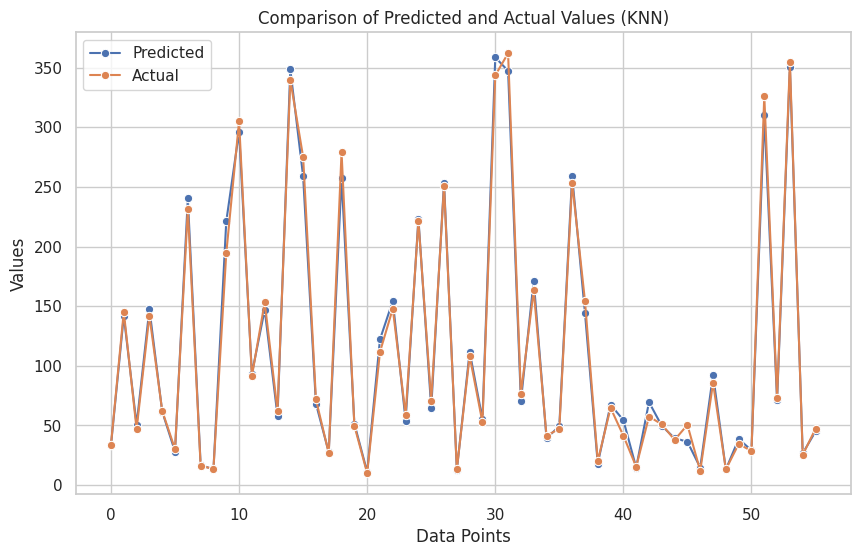

In [132]:
#plot the model
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plotting predicted values in blue
sns.lineplot(data=knn_pred, label="Predicted", marker='o')

# Plotting actual values in orange
sns.lineplot(data=y_test, label="Actual", marker='o')

plt.title("Comparison of Predicted and Actual Values (KNN)")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()

plt.show()

#XG Boost

In [133]:
#import XG Boost Library
import xgboost as xgb

In [134]:
# Convert data to DMatrix format (optimized for XGBoost)
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

# Define XGBoost parameters
params = {
    'objective': 'reg:squarederror',  # for regression tasks
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'eval_metric': 'rmse'  # root mean squared error
}

# Train the XGBoost model
model = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions on the test set
xg_pred = model.predict(dtest)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, xg_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 134.61828753685577


In [135]:
r2_xg = r2_score(y_test,xg_pred)
print(r2_xg)

0.9879527176271282


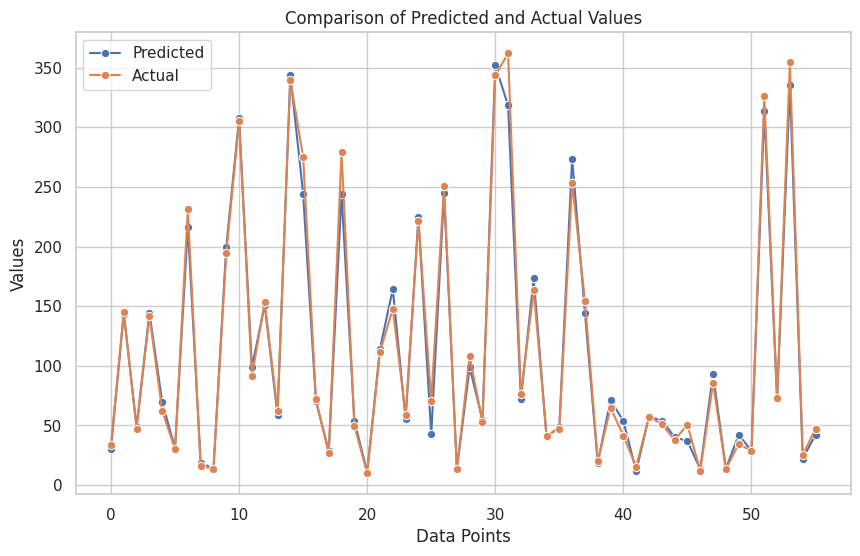

In [136]:
# Creating a figure and axes
plt.figure(figsize=(10, 6))

# Plotting using Seaborn
sns.lineplot(data=xg_pred, label="Predicted", marker='o')
sns.lineplot(data=y_test, label="Actual", marker='o')

# Adding legend
plt.legend()

# Adding labels and title
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.title("Comparison of Predicted and Actual Values")

# Display the plot
plt.show()

#Random Forest




In [137]:
rf = RandomForestRegressor()
params = {'n_estimators':[100,200,300],'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],'max_features':['sqrt', 'log2', None]}
rf_model = GridSearchCV(rf,params,cv=5)


In [138]:
rf_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 200, 300]})

In [139]:
rf_model.best_params_

{'criterion': 'friedman_mse', 'max_features': None, 'n_estimators': 100}

In [140]:
rf = RandomForestRegressor(criterion= 'friedman_mse', max_features= None, n_estimators= 300)

In [141]:
rf.fit(x_train,y_train)

RandomForestRegressor(criterion='friedman_mse', max_features=None,
                      n_estimators=300)

In [142]:
rf_predict_ = rf.predict(x_test)

In [143]:
rf_r2 = r2_score(y_test,rf_predict_)

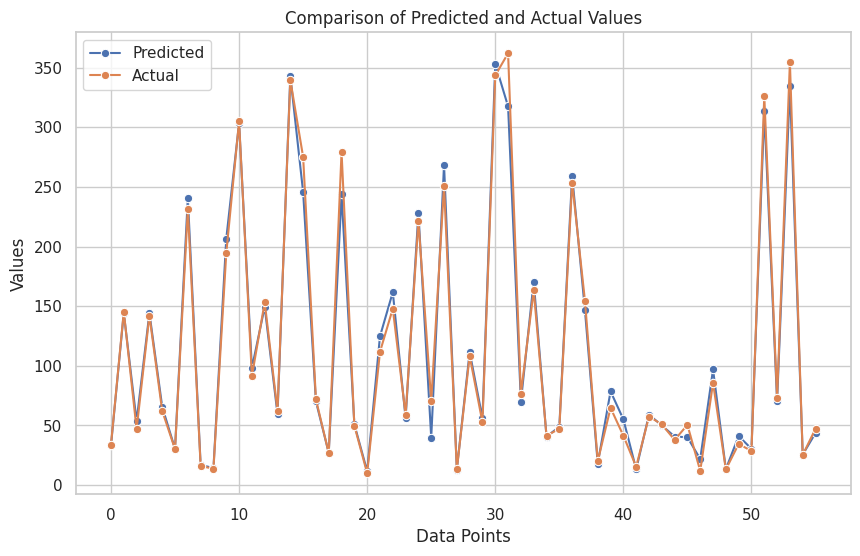

In [144]:
# Setting Seaborn style
sns.set(style="whitegrid")

# Creating a figure and axes
plt.figure(figsize=(10, 6))

# Plotting using Seaborn
sns.lineplot(data=rf_predict_, label="Predicted", marker='o')
sns.lineplot(data=y_test, label="Actual", marker='o')

# Adding legend
plt.legend()

# Adding labels and title
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.title("Comparison of Predicted and Actual Values")

# Display the plot
plt.show()

#Ridge Regression

In [145]:
ridge =Ridge()
param = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,0.3,0.7,1,1.2,1.33,1.365,1.37,1.375,1.4,1.5,1.6,1.8,2.5,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, param, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)
ridge_regressor.best_params_

{'alpha': 100}

In [146]:
ridge =Ridge(alpha= 100)

In [147]:
ridge.fit(x_train,y_train)

Ridge(alpha=100)

In [148]:
y_pred_ridge = ridge.predict(x_test)

In [149]:
ridge_r2 = r2_score(y_test,y_pred_ridge)

In [150]:
ridge_r2

0.99438306028034

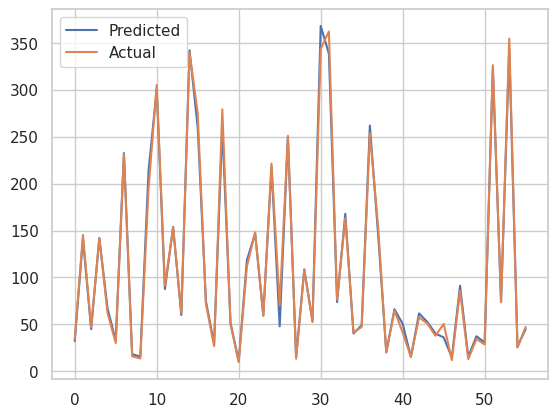

In [151]:
#plot the ridge
plt.plot(y_pred_ridge)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

Lasso Regression

In [152]:
lasso =Lasso()
param = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,0.3,0.7,1,1.2,1.33,1.365,1.37,1.375,1.4,1.5,1.6,1.8,2.5,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, param, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 0.3, 0.7, 1, 1.2, 1.33, 1.365, 1.37,
                                   1.375, 1.4, 1.5, 1.6, 1.8, 2.5, 5, 10, 20,
                                   30, 40, 45, 50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [153]:
lasso_regressor.best_params_

{'alpha': 1e-05}

In [154]:
lasso =Lasso(alpha= 1.6)


In [155]:
lasso.fit(x_train,y_train)


Lasso(alpha=1.6)

In [156]:
lasso_predict = lasso.predict(x_test)

In [157]:
lasso_r2 = r2_score(lasso_predict,y_test)

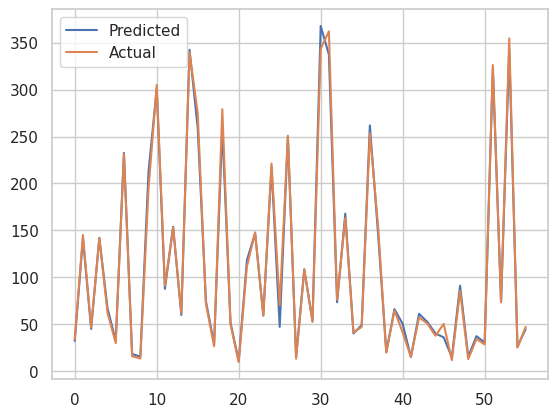

In [158]:
plt.plot(lasso_predict)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

#Elasticnet Regressor

In [159]:
elastic =ElasticNet()
param = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,0.001,0.01,0.02,0.03,0.04,1,5,10,20,40,50,60,100],
                          'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
elastic_regressor = GridSearchCV(elastic, param, scoring='neg_mean_squared_error', cv=5)
elastic_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.001, 0.01, 0.02, 0.03, 0.04, 1, 5,
                                   10, 20, 40, 50, 60, 100],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9]},
             scoring='neg_mean_squared_error')

In [160]:
elastic_regressor.best_params_

{'alpha': 5, 'l1_ratio': 0.1}

In [161]:
elastic =ElasticNet(alpha = 5, l1_ratio = 0.1)

In [162]:
elastic.fit(x_train,y_train)

ElasticNet(alpha=5, l1_ratio=0.1)

In [163]:
elastic_predict = elastic.predict(x_test)

In [164]:
elastic_r2 = r2_score(elastic_predict,y_test)

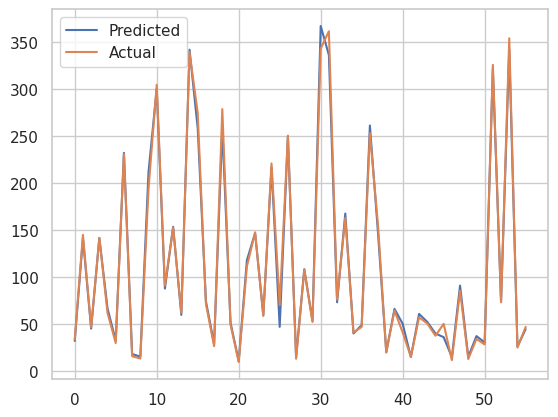

In [165]:
plt.plot(elastic_predict)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

In [166]:
# Evaluation summary
overall_evaluatiion = pd.DataFrame(data={'model':['linear regression','ridge regression', 'lasso regression','elastic net regression','knn regression','RandomForest Regression'],'r2_score':[linear_r2,ridge_r2,lasso_r2,elastic_r2,r2_knn,rf_r2]})


In [167]:
overall_evaluatiion.sort_values(by=['r2_score'],ascending=False,inplace=True)

In [168]:
print(overall_evaluatiion)

                     model  r2_score
1         ridge regression  0.994383
0        linear regression  0.994280
4           knn regression  0.994175
2         lasso regression  0.994072
3   elastic net regression  0.993987
5  RandomForest Regression  0.987510


# **Conclusion**

By leveraging data visualization techniques on our target variable, we discerned a noticeable impact on stock prices during the period of the 2018 fraud case involving Rana Kapoor, where a significant and dramatic decline is evident.

Upon loading our dataset, a thorough examination revealed an absence of null values and duplicate entries, ensuring the data's integrity. While outliers were identified in our features, the limited size of the dataset prompted caution against their removal to prevent information loss.

The positive skewness observed in the distribution of all variables led us to apply power transformations, enhancing the suitability of the data for modeling purposes.

The strong correlation between the dependent and independent variables signals a dependency that facilitates accurate predictions of the dependent variable based on the features. However, we noted a substantial correlation among independent variables, indicative of multicollinearity. Given the small dataset, addressing this multicollinearity proves challenging yet inevitable.

Several models were implemented to predict the closing price, and notably, all models exhibited commendable performance. The Ridge regressor stood out as the top-performing model, achieving an impressive R2 score of 0.994383. Its prowess extends to consistently high scores across various evaluation metrics, underscoring its effectiveness in capturing the underlying patterns within the dataset.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***